In [169]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [170]:
!pip install mplfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Import libraries

In [171]:
import pandas as pd
import numpy as np
import yfinance as yf
import mplfinance as mpf

# Import data

In [172]:
start = '2022-01-01'
end = '2023-01-01'
stock = 'NVDA'

In [173]:
data = yf.download(tickers=stock,start=start, end=end)
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03 00:00:00-05:00,298.149994,307.109985,297.850006,301.209991,300.928589,39154700
2022-01-04 00:00:00-05:00,302.769989,304.679993,283.489990,292.899994,292.626373,52715400
2022-01-05 00:00:00-05:00,289.489990,294.160004,275.329987,276.040009,275.782135,49806400
2022-01-06 00:00:00-05:00,276.399994,284.380005,270.649994,281.779999,281.516754,45418600
2022-01-07 00:00:00-05:00,281.410004,284.220001,270.570007,272.470001,272.215454,40993900


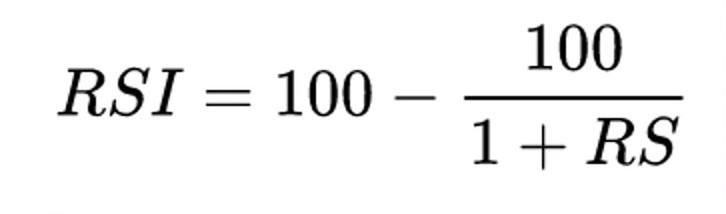

# RSI Calculation

In [174]:
def rsi_function(df, days=14):
  chg = df['Close'].diff()
  chg.dropna(inplace=True)
  chg_up = chg.where(chg > 0, 0)
  chg_down = chg.where(chg < 0, 0)

  avg_up = chg_up.rolling(days).mean()
  avg_down = chg_down.rolling(days).mean().abs()
  rsi = avg_up / avg_down
  rsi = 100 - (100/(1+rsi))
  df['rsi'] = rsi
    
  return df 

In [175]:
df = rsi_function(data)

In [176]:
df

,Open,High,Low,Close,Adj Close,Volume,rsi
Date,,,,,,,
2022-01-03 00:00:00-05:00,298.149994,307.109985,297.850006,301.209991,300.928589,39154700,NaN
2022-01-04 00:00:00-05:00,302.769989,304.679993,283.489990,292.899994,292.626373,52715400,NaN
2022-01-05 00:00:00-05:00,289.489990,294.160004,275.329987,276.040009,275.782135,49806400,NaN
2022-01-06 00:00:00-05:00,276.399994,284.380005,270.649994,281.779999,281.516754,45418600,NaN
2022-01-07 00:00:00-05:00,281.410004,284.220001,270.570007,272.470001,272.215454,40993900,NaN
...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,151.960007,153.389999,148.830002,152.059998,152.059998,34932600,39.587655
2022-12-27 00:00:00-05:00,150.740005,151.000000,140.559998,141.210007,141.210007,46490200,37.048869
2022-12-28 00:00:00-05:00,139.270004,142.619995,138.839996,140.360001,140.360001,35106600,35.438795


# Signal

In [177]:
df.loc[df['rsi'] > 70, 'action'] = 'sell'
df.loc[df['rsi'] < 30, 'action'] = 'buy'

df.loc[df['action'] == 'buy', 'marker_position'] = df['Low'] * 0.95
df.loc[df['action'] == 'sell', 'marker_position'] = df['High'] * 1.02

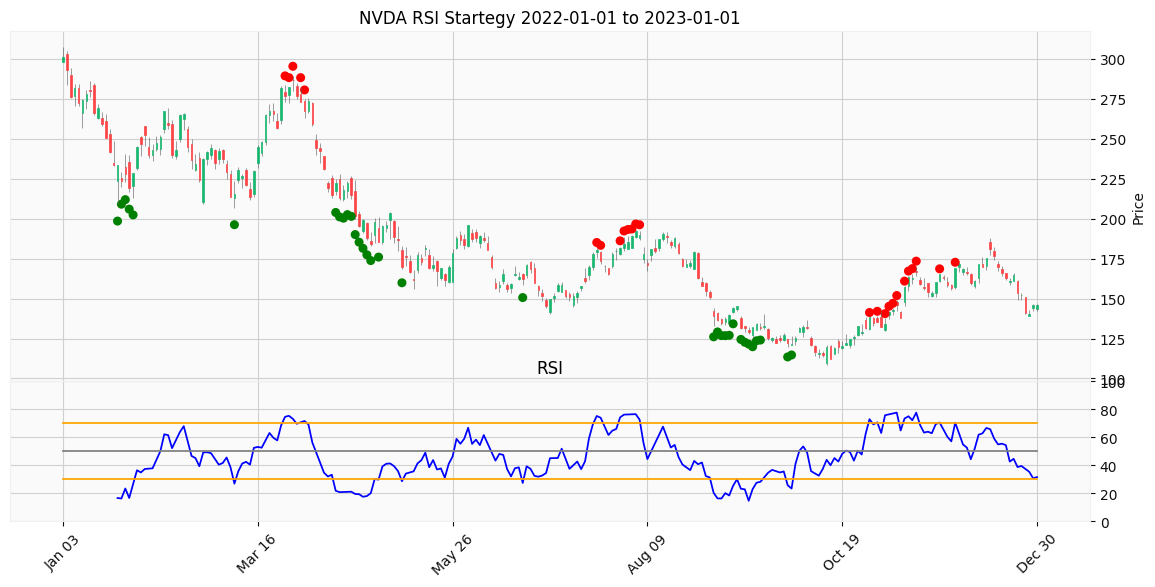

In [187]:
df['lower'] = 30
df['mid'] = 50
df['upper'] = 70
rsi_ylim = (0,100)

#RSI plot
rsi = mpf.make_addplot(df['rsi'],color='blue', panel=1, title="RSI", ylim=rsi_ylim)
rsi_lower = mpf.make_addplot(df['lower'], panel = 1, color='orange', ylim=rsi_ylim)
rsi_mid = mpf.make_addplot(df['mid'], panel = 1, color='gray', ylim=rsi_ylim)
rsi_upper = mpf.make_addplot(df['upper'], panel = 1, color='orange', ylim=rsi_ylim)

#Signal
color_marker = ['green' if x == 'buy' else 'red' for x in df['action']]
signal = mpf.make_addplot(data['marker_position'], type='scatter', markersize= 30, color=color_marker)

#Plot
addedplot = [rsi, signal, rsi_lower, rsi_mid, rsi_upper]

mpf.plot(df,type='candle', style='yahoo', addplot=addedplot,figsize=(15, 7),
            axtitle=f'{stock} RSI Startegy {start} to {end}')

# Action

In [189]:
action_data = data.copy()

In [190]:
action_data

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid
Date,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,298.149994,307.109985,297.850006,301.209991,300.928589,39154700,NaN,NaN,NaN,30,70,50
2022-01-04 00:00:00-05:00,302.769989,304.679993,283.489990,292.899994,292.626373,52715400,NaN,NaN,NaN,30,70,50
2022-01-05 00:00:00-05:00,289.489990,294.160004,275.329987,276.040009,275.782135,49806400,NaN,NaN,NaN,30,70,50
2022-01-06 00:00:00-05:00,276.399994,284.380005,270.649994,281.779999,281.516754,45418600,NaN,NaN,NaN,30,70,50
2022-01-07 00:00:00-05:00,281.410004,284.220001,270.570007,272.470001,272.215454,40993900,NaN,NaN,NaN,30,70,50
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23 00:00:00-05:00,151.960007,153.389999,148.830002,152.059998,152.059998,34932600,39.587655,NaN,NaN,30,70,50
2022-12-27 00:00:00-05:00,150.740005,151.000000,140.559998,141.210007,141.210007,46490200,37.048869,NaN,NaN,30,70,50
2022-12-28 00:00:00-05:00,139.270004,142.619995,138.839996,140.360001,140.360001,35106600,35.438795,NaN,NaN,30,70,50


In [191]:
action_data['action_price'] = action_data['Open'].shift(-1)

In [207]:
action_data.head(30)

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2022-01-03 00:00:00-05:00,298.149994,307.109985,297.850006,301.209991,300.928589,39154700,NaN,NaN,NaN,30,70,50,302.769989
2022-01-04 00:00:00-05:00,302.769989,304.679993,283.489990,292.899994,292.626373,52715400,NaN,NaN,NaN,30,70,50,289.489990
2022-01-05 00:00:00-05:00,289.489990,294.160004,275.329987,276.040009,275.782135,49806400,NaN,NaN,NaN,30,70,50,276.399994
2022-01-06 00:00:00-05:00,276.399994,284.380005,270.649994,281.779999,281.516754,45418600,NaN,NaN,NaN,30,70,50,281.410004
2022-01-07 00:00:00-05:00,281.410004,284.220001,270.570007,272.470001,272.215454,40993900,NaN,NaN,NaN,30,70,50,265.809998
2022-01-10 00:00:00-05:00,265.809998,274.690002,256.440002,274.000000,273.744049,59468100,NaN,NaN,NaN,30,70,50,273.230011
2022-01-11 00:00:00-05:00,273.230011,280.649994,268.390015,278.170013,277.910126,40408900,NaN,NaN,NaN,30,70,50,280.670013
2022-01-12 00:00:00-05:00,280.670013,285.950012,276.079987,279.989990,279.728424,38341300,NaN,NaN,NaN,30,70,50,283.790009
2022-01-13 00:00:00-05:00,283.790009,284.799988,264.980011,265.750000,265.501740,54017100,NaN,NaN,NaN,30,70,50,263.000000


In [195]:
record = action_data[action_data.action.notnull()]
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price
Date,,,,,,,,,,,,,
2022-01-24 00:00:00-05:00,223.300003,233.800003,208.880005,233.720001,233.501663,91398200,16.704486,buy,198.436005,30,70,50,225.460007
2022-01-25 00:00:00-05:00,225.460007,229.429993,220.000000,223.240005,223.031448,66461600,16.354325,buy,209.000000,30,70,50,232.399994
2022-01-26 00:00:00-05:00,232.399994,240.570007,223.000000,227.720001,227.507263,75595900,23.491323,buy,211.850000,30,70,50,235.679993
2022-01-27 00:00:00-05:00,235.679993,239.949997,216.750000,219.440002,219.234985,57335300,16.727156,buy,205.912500,30,70,50,220.119995
2022-01-28 00:00:00-05:00,220.119995,228.580002,212.960007,228.399994,228.186615,54377400,26.390221,buy,202.312006,30,70,50,231.820007
2022-03-08 00:00:00-05:00,213.089996,223.729996,206.500000,215.139999,214.975632,55746700,26.980297,buy,196.175000,30,70,50,223.869995
2022-03-25 00:00:00-04:00,278.859985,283.579987,272.709991,276.920013,276.708435,57901600,74.719285,sell,289.251586,30,70,50,277.559998
2022-03-28 00:00:00-04:00,277.559998,282.500000,272.059998,282.190002,281.974426,42549400,75.418917,sell,288.150000,30,70,50,286.950012
2022-03-29 00:00:00-04:00,286.950012,289.459991,279.799988,286.559998,286.341064,48898400,73.264067,sell,295.249191,30,70,50,283.040009


In [196]:
record['helper'] = record.action.shift(-1)
record

<ipython-input-196-d308a5d4e3b2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  record['helper'] = record.action.shift(-1)


,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2022-01-24 00:00:00-05:00,223.300003,233.800003,208.880005,233.720001,233.501663,91398200,16.704486,buy,198.436005,30,70,50,225.460007,buy
2022-01-25 00:00:00-05:00,225.460007,229.429993,220.000000,223.240005,223.031448,66461600,16.354325,buy,209.000000,30,70,50,232.399994,buy
2022-01-26 00:00:00-05:00,232.399994,240.570007,223.000000,227.720001,227.507263,75595900,23.491323,buy,211.850000,30,70,50,235.679993,buy
2022-01-27 00:00:00-05:00,235.679993,239.949997,216.750000,219.440002,219.234985,57335300,16.727156,buy,205.912500,30,70,50,220.119995,buy
2022-01-28 00:00:00-05:00,220.119995,228.580002,212.960007,228.399994,228.186615,54377400,26.390221,buy,202.312006,30,70,50,231.820007,buy
2022-03-08 00:00:00-05:00,213.089996,223.729996,206.500000,215.139999,214.975632,55746700,26.980297,buy,196.175000,30,70,50,223.869995,sell
2022-03-25 00:00:00-04:00,278.859985,283.579987,272.709991,276.920013,276.708435,57901600,74.719285,sell,289.251586,30,70,50,277.559998,sell
2022-03-28 00:00:00-04:00,277.559998,282.500000,272.059998,282.190002,281.974426,42549400,75.418917,sell,288.150000,30,70,50,286.950012,sell
2022-03-29 00:00:00-04:00,286.950012,289.459991,279.799988,286.559998,286.341064,48898400,73.264067,sell,295.249191,30,70,50,283.040009,sell


In [198]:
record = record.loc[record['helper']!=record['action']]
record = record.iloc[1:]
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper
Date,,,,,,,,,,,,,,
2022-04-01 00:00:00-04:00,273.750000,274.959991,262.670013,267.119995,266.915894,51723500,71.726144,sell,280.459191,30,70,50,267.279999,buy
2022-06-23 00:00:00-04:00,165.190002,165.850006,158.529999,162.250000,162.160309,46368000,27.460175,buy,150.603499,30,70,50,165.000000,sell
2022-08-05 00:00:00-04:00,188.100006,192.289993,186.660004,189.889999,189.785034,38606800,72.654541,sell,196.135793,30,70,50,175.020004,buy
2022-09-30 00:00:00-04:00,120.870003,126.330002,120.750000,121.389999,121.358955,56563800,23.463461,buy,114.712500,30,70,50,123.470001,sell
2022-11-30 00:00:00-05:00,156.970001,169.300003,155.970001,169.229996,169.229996,56529800,70.517661,sell,172.686003,30,70,50,169.990005,NaN


In [200]:
record['return'] = record['action_price'].pct_change()
record

,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return
Date,,,,,,,,,,,,,,,
2022-04-01 00:00:00-04:00,273.750000,274.959991,262.670013,267.119995,266.915894,51723500,71.726144,sell,280.459191,30,70,50,267.279999,buy,NaN
2022-06-23 00:00:00-04:00,165.190002,165.850006,158.529999,162.250000,162.160309,46368000,27.460175,buy,150.603499,30,70,50,165.000000,sell,-0.382670
2022-08-05 00:00:00-04:00,188.100006,192.289993,186.660004,189.889999,189.785034,38606800,72.654541,sell,196.135793,30,70,50,175.020004,buy,0.060727
2022-09-30 00:00:00-04:00,120.870003,126.330002,120.750000,121.389999,121.358955,56563800,23.463461,buy,114.712500,30,70,50,123.470001,sell,-0.294538
2022-11-30 00:00:00-05:00,156.970001,169.300003,155.970001,169.229996,169.229996,56529800,70.517661,sell,172.686003,30,70,50,169.990005,NaN,0.376772


In [201]:
record.reset_index(inplace=True)

In [202]:
record['previous_sig_date'] = record['Date'].shift(1)
record['previous_action'] = record['action'].shift(1)
record['previous_act_price'] = record['action_price'].shift(1)
record.rename(columns={'Date':'today_sig_date'}, inplace=True)

record

,today_sig_date,Open,High,Low,Close,Adj Close,Volume,rsi,action,marker_position,lower,upper,mid,action_price,helper,return,previous_sig_date,previous_action,previous_act_price
0,2022-04-01 00:00:00-04:00,273.750000,274.959991,262.670013,267.119995,266.915894,51723500,71.726144,sell,280.459191,30,70,50,267.279999,buy,NaN,NaT,NaN,NaN
1,2022-06-23 00:00:00-04:00,165.190002,165.850006,158.529999,162.250000,162.160309,46368000,27.460175,buy,150.603499,30,70,50,165.000000,sell,-0.382670,2022-04-01 00:00:00-04:00,sell,267.279999
2,2022-08-05 00:00:00-04:00,188.100006,192.289993,186.660004,189.889999,189.785034,38606800,72.654541,sell,196.135793,30,70,50,175.020004,buy,0.060727,2022-06-23 00:00:00-04:00,buy,165.000000
3,2022-09-30 00:00:00-04:00,120.870003,126.330002,120.750000,121.389999,121.358955,56563800,23.463461,buy,114.712500,30,70,50,123.470001,sell,-0.294538,2022-08-05 00:00:00-04:00,sell,175.020004
4,2022-11-30 00:00:00-05:00,156.970001,169.300003,155.970001,169.229996,169.229996,56529800,70.517661,sell,172.686003,30,70,50,169.990005,NaN,0.376772,2022-09-30 00:00:00-04:00,buy,123.470001


In [203]:
record = record[['action','today_sig_date','action_price','return','previous_sig_date','previous_action','previous_act_price']]

In [204]:
profit = record[record.action == 'sell']

In [205]:
profit

,action,today_sig_date,action_price,return,previous_sig_date,previous_action,previous_act_price
0,sell,2022-04-01 00:00:00-04:00,267.279999,NaN,NaT,NaN,NaN
2,sell,2022-08-05 00:00:00-04:00,175.020004,0.060727,2022-06-23 00:00:00-04:00,buy,165.000000
4,sell,2022-11-30 00:00:00-05:00,169.990005,0.376772,2022-09-30 00:00:00-04:00,buy,123.470001


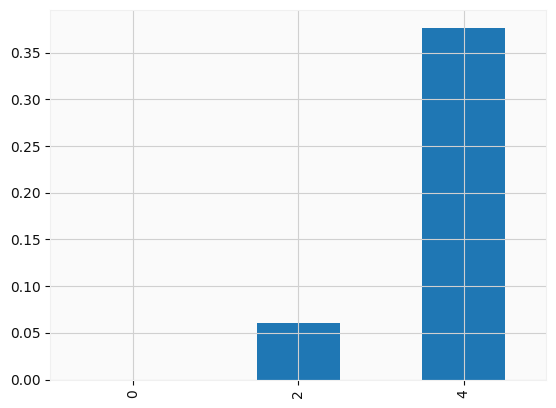

In [206]:
profit['return'].plot(kind='bar')